In [1]:
pwd

'C:\\Users\\Edgard_Cuadra\\OneDrive\\Desktop\\Ironhack\\Projects\\Project_2_Pipeline'

In [2]:
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
import src.clean as cl

In [4]:
cl

<module 'src.clean' from 'C:\\Users\\Edgard_Cuadra\\OneDrive\\Desktop\\Ironhack\\Projects\\Project_2_Pipeline\\src\\clean.py'>

In [5]:
cl.setcanvas()

In [6]:
toprank = pd.read_csv(".\\input\\toprank_stats.csv", encoding='latin1')

In [7]:
toprank = toprank.rename(columns={" Total Salary ": "Salary"})

In [8]:
toprank["Salary"] = toprank["Salary"].str.strip("$")

In [9]:
toprank["Salary"] = toprank["Salary"].str.replace(",","")

In [10]:
toprank["Salary"] = toprank["Salary"].str.split(".",expand=True)[0]

In [11]:
toprank["Salary"] = toprank["Salary"].apply(int)

In [12]:
toprank.sample(2)

Player Position Team   Player.1 Position.1 Team.1  Eisenberg_ranking  \
5    M. Evans       WR   TB   M. Evans         WR     TB                 18   
22  D. Mooney       WR  CHI  D. Mooney         WR    CHI                 56   

    Richards_ranking  Cummings_ranking  My_Ranking  ... Jersey Number  \
5                 20                24       20.67  ...            13   
22                59                45       53.33  ...            11   

      Salary   Signing Bonus  Years Pro  Height  Weight   Birthdate   College  \
5   49250000  $46,510,000.00          6      77     231   8/21/1993  Texas AM   
22   2917050     $280,000.00          0      70     176  10/29/1997    Tulane   

     Player.2  Team.2  
5    M. Evans      TB  
22  D. Mooney     CHI  

[2 rows x 37 columns]

# Analizing out top players data

first we want to see if there is a strog corrolation between any of the variable available. 

In [13]:
stat_corr = toprank.corr()
stat_corr.sample(10)

Eisenberg_ranking  Richards_ranking  Cummings_ranking  \
Awareness                 -0.138430         -0.134720         -0.199109   
Agility                   -0.213997         -0.162713         -0.208738   
Speed                     -0.238927         -0.185382         -0.149443   
Catching                  -0.299444         -0.192959         -0.189886   
Years Pro                  0.087756          0.044142         -0.035482   
Acceleration              -0.192694         -0.138344         -0.090975   
Richards_ranking           0.961493          1.000000          0.937932   
Carrying                  -0.135398         -0.076153         -0.076888   
My_Ranking                 0.984194          0.983893          0.977264   
Age                        0.127398          0.091611         -0.001233   

                  My_Ranking  Overall Rating       Age     Speed  \
Awareness          -0.161075        0.935678  0.541423  0.068542   
Agility            -0.199162        0.333734 -0.225716  0.676301   
Speed              -0.194267        0.012316 -0.579100  1.000000   
Catching           -0.231333        0.137044 -0.034237  0.435345   
Years Pro           0.031716        0.570257  0.968959 -0.520680   
Acceleration       -0.142620        0.054889 -0.607269  0.930676   
Richards_ranking    0.983893       -0.161594  0.091611 -0.185382   
Carrying           -0.097778        0.108001 -0.106836  0.390293   
My_Ranking          1.000000       -0.192721  0.072799 -0.194267   
Age                 0.072799        0.539472  1.000000 -0.579100   

                  Acceleration  Awareness   Agility  ...  Carrying  Catching  \
Awareness             0.096445   1.000000  0.323890  ...  0.177233  0.216632   
Agility               0.725582   0.323890  1.000000  ...  0.213350  0.330868   
Speed                 0.930676   0.068542  0.676301  ...  0.390293  0.435345   
Catching              0.394028   0.216632  0.330868  ...  0.725694  1.000000   
Years Pro            -0.569870   0.577057 -0.176934  ... -0.089835 -0.027698   
Acceleration          1.000000   0.096445  0.725582  ...  0.310484  0.394028   
Richards_ranking     -0.138344  -0.134720 -0.162713  ... -0.076153 -0.192959   
Carrying              0.310484   0.177233  0.213350  ...  1.000000  0.725694   
My_Ranking           -0.142620  -0.161075 -0.199162  ... -0.097778 -0.231333   
Age                  -0.607269   0.541423 -0.225716  ... -0.106836 -0.034237   

                   Jumping    Tackle    Injury  Jersey Number    Salary  \
Awareness         0.175020 -0.127709  0.246259      -0.078531  0.481186   
Agility           0.390272 -0.151120 -0.002468      -0.302118  0.328432   
Speed             0.687889 -0.051656 -0.367069      -0.154003  0.149788   
Catching          0.564125  0.032997 -0.252715       0.291511  0.209919   
Years Pro        -0.352456 -0.077450  0.255365      -0.080016  0.371027   
Acceleration      0.685576 -0.125388 -0.337742      -0.131899  0.165841   
Richards_ranking -0.207937 -0.052487  0.007290      -0.038173 -0.013377   
Carrying          0.390666  0.129230 -0.210227       0.128133  0.074014   
My_Ranking       -0.206764 -0.017014 -0.000665      -0.030408 -0.041296   
Age              -0.397565 -0.022724  0.244769      -0.039581  0.310617   

                  Years Pro    Height    Weight  
Awareness          0.577057  0.015751  0.062600  
Agility           -0.176934 -0.584894 -0.551429  
Speed             -0.520680 -0.475072 -0.451939  
Catching          -0.027698 -0.161972 -0.175594  
Years Pro          1.000000  0.108319  0.076967  
Acceleration      -0.569870 -0.386466 -0.349550  
Richards_ranking   0.044142 -0.070819 -0.094719  
Carrying          -0.089835 -0.166621 -0.217033  
My_Ranking         0.031716 -0.010588 -0.051317  
Age                0.968959  0.146724  0.140539  

[10 rows x 23 columns]

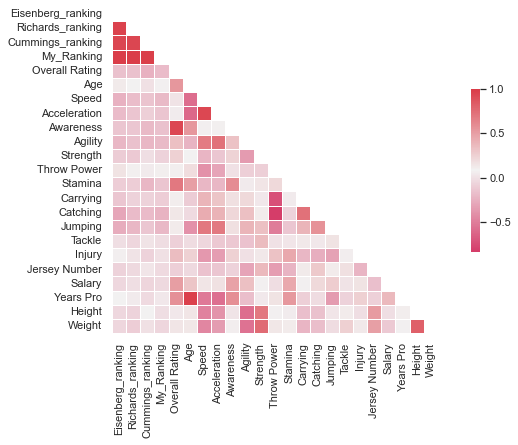

In [172]:
mask = np.triu(np.ones_like(stat_corr, dtype=bool)) 
color_map = sns.diverging_palette(0, 10, as_cmap=True)
sns.heatmap(stat_corr,  
            mask = mask,
            cmap=color_map,
            square=True, 
            linewidth=0.5, 
            vmax=1,
            cbar_kws={"shrink": .5}
);

plt.savefig(".\\images\\Corrolation", dpi=1000)

In [15]:
ranpos = px.scatter(toprank, x="Years Pro", y="My_Ranking", color="Position", size ="Salary",
                 title="My Ranking Vs Position, Years Pro and Salary",
                 hover_data=['Player'])
ranpos.show()

In [76]:
overall = px.scatter(toprank, x="Years Pro", y="Overall Rating", color="Position", size ="Salary",
                 title="Overall Skill Rating Vs Position, Years Pro and Salary",
                 hover_data=['Player'])

overall.show()

In [17]:
perform = px.scatter_matrix(toprank,
                dimensions=['Speed','Injury','Stamina','Catching','Age'],
                color="Position", title="Comparing High Corrolation Variables"
                       )
    
perform.update_traces(diagonal_visible=False)
perform.show()

In [171]:
perform = px.scatter_matrix(toprank,
                dimensions=['Awareness','Salary','Years Pro','Age'],
                color="Position", title="Comparing High Corrolation Variables"
                       )
    
perform.update_traces(diagonal_visible=False)
perform.show()

plt.savefig(".\\images\\HighCorrolationVar.png", dpi=1000)

<Figure size 864x432 with 0 Axes>

In [19]:
perform = px.scatter_matrix(toprank,
                dimensions=['Eisenberg_ranking','Richards_ranking','Cummings_ranking','My_Ranking','Overall Rating'],
                color="Position", title="Comparing Rankings"
                       )
    
perform.update_traces(diagonal_visible=False)
perform.show()

In [29]:
overall = px.scatter(toprank, x="My_Ranking", y="Overall Rating", color="Position", size ="Salary",
                 title="Overall Skill Rating Vs Position, My Ranking and Salary",
                 hover_data=['Player'])
overall.show()

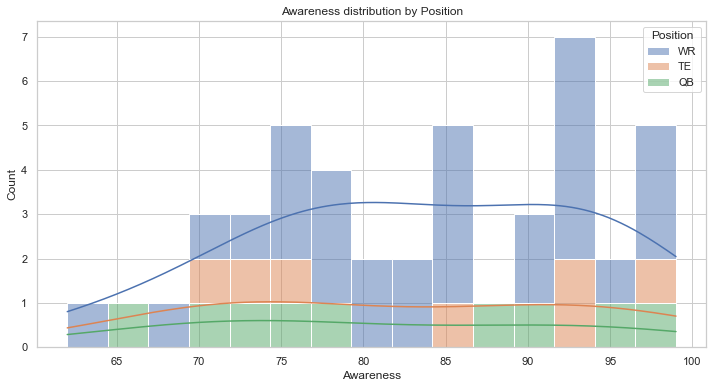

In [169]:
sns.histplot(data=toprank, x="Awareness", hue="Position",multiple="stack", bins=15, kde=True).set_title("Awareness distribution by Position")
plt.savefig(".\\images\\awareness_by_position.png", dpi=1000)

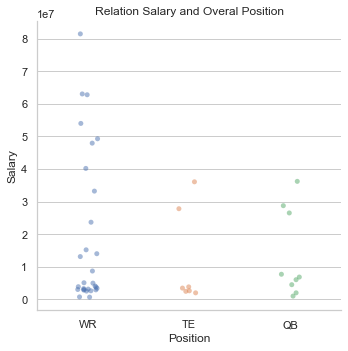

In [168]:
sns.catplot(data=toprank, x="Position", y="Salary", alpha=0.5).set(title='Relation Salary and Overal Position')
plt.savefig(".\\images\\salary_by_position.png", dpi=1000)

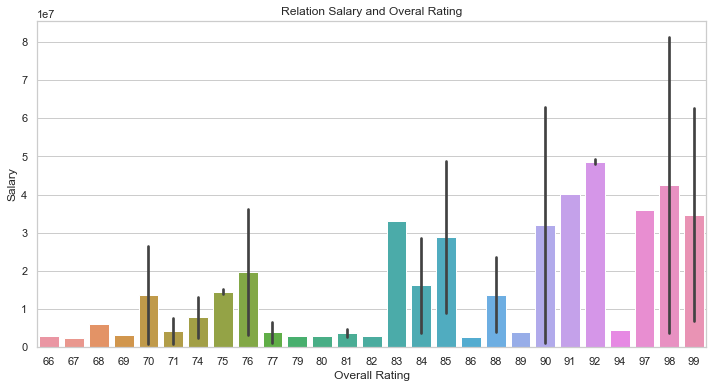

In [167]:
barplot = sns.barplot(x="Overall Rating", y="Salary", data=toprank, ci="sd", ).set(title='Relation Salary and Overal Rating')
plt.savefig(".\\images\\salary_rating.png", dpi=1000)

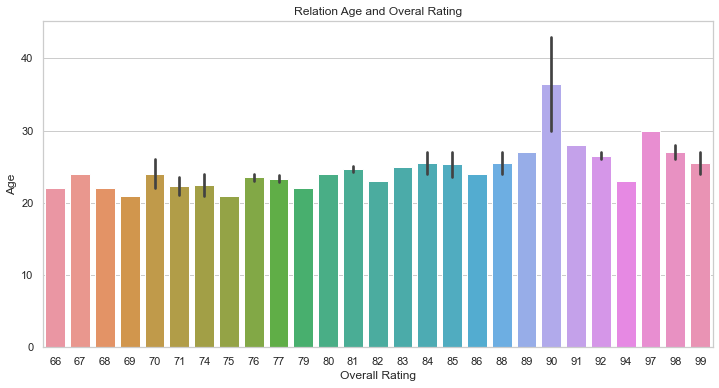

In [166]:
barplot = sns.barplot(x="Overall Rating", y="Age", data=toprank, ci="sd", ).set(title='Relation Age and Overal Rating')
plt.savefig(".\\images\\age_overallperformance.png", dpi=1000)

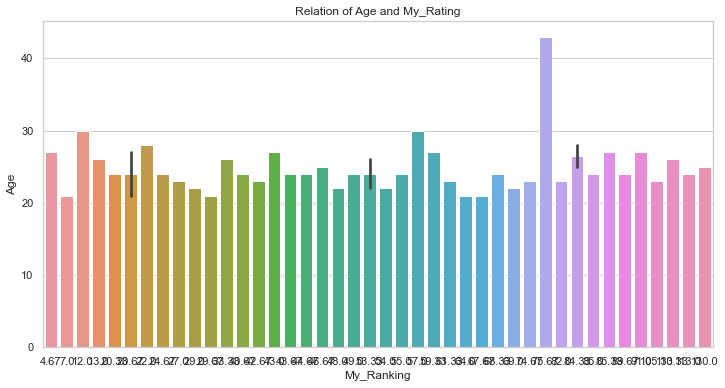

In [165]:
barplot = sns.barplot(x="My_Ranking", y="Age", data=toprank, ci="sd") .set(title='Relation of Age and My_Rating')
plt.savefig(".\\images\\age_rating.png", dpi=1000)

In [26]:
toprank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player             45 non-null     object 
 1   Position           45 non-null     object 
 2   Team               45 non-null     object 
 3   Player.1           45 non-null     object 
 4   Position.1         45 non-null     object 
 5   Team.1             45 non-null     object 
 6   Eisenberg_ranking  45 non-null     int64  
 7   Richards_ranking   45 non-null     int64  
 8   Cummings_ranking   45 non-null     int64  
 9   My_Ranking         45 non-null     float64
 10  Nickname           45 non-null     object 
 11  Full Name          45 non-null     object 
 12  Overall Rating     45 non-null     int64  
 13  Position.2         45 non-null     object 
 14  Age                45 non-null     int64  
 15  Speed              45 non-null     int64  
 16  Acceleration       45 non-nu

In [27]:
toprank.describe()

Eisenberg_ranking  Richards_ranking  Cummings_ranking  My_Ranking  \
count          45.000000         45.000000         45.000000   45.000000   
mean           54.933333         55.955556         55.466667   55.452000   
std            30.573607         30.077896         31.858066   30.271753   
min             4.000000          8.000000          2.000000    4.670000   
25%            28.000000         34.000000         30.000000   29.670000   
50%            54.000000         54.000000         52.000000   53.330000   
75%            77.000000         76.000000         77.000000   75.670000   
max           120.000000        137.000000        133.000000  130.000000   

       Overall Rating        Age      Speed  Acceleration  Awareness  \
count       45.000000  45.000000  45.000000     45.000000  45.000000   
mean        81.888889  24.822222  88.066667     89.488889  83.555556   
std          9.446554   3.626223   5.730302      4.314996  10.145656   
min         66.000000  21.000000  60.000000     66.000000  62.000000   
25%         75.000000  23.000000  86.000000     88.000000  75.000000   
50%         81.000000  24.000000  89.000000     90.000000  85.000000   
75%         89.000000  26.000000  91.000000     92.000000  92.000000   
max         99.000000  43.000000  96.000000     96.000000  99.000000   

         Agility  ...   Carrying   Catching    Jumping     Tackle     Injury  \
count  45.000000  ...  45.000000  45.000000  45.000000  45.000000  45.000000   
mean   87.111111  ...  72.666667  78.066667  85.822222  34.333333  89.288889   
std     5.223297  ...   4.908249  20.405436   9.118634   6.987001   4.309726   
min    70.000000  ...  53.000000  26.000000  47.000000  24.000000  77.000000   
25%    84.000000  ...  71.000000  81.000000  84.000000  29.000000  87.000000   
50%    87.000000  ...  74.000000  84.000000  88.000000  33.000000  90.000000   
75%    92.000000  ...  76.000000  90.000000  91.000000  37.000000  91.000000   
max    97.000000  ...  80.000000  99.000000  99.000000  55.000000  99.000000   

       Jersey Number        Salary  Years Pro     Height      Weight  
count      45.000000  4.500000e+01  45.000000  45.000000   45.000000  
mean       33.288889  1.675650e+07   2.866667  74.200000  216.866667  
std        33.836923  2.066045e+07   3.401871   2.417737   21.804503  
min         1.000000  6.800000e+05   0.000000  70.000000  176.000000  
25%        12.000000  3.010000e+06   1.000000  73.000000  203.000000  
50%        14.000000  4.970000e+06   2.000000  74.000000  215.000000  
75%        81.000000  2.780000e+07   4.000000  76.000000  230.000000  
max        89.000000  8.142000e+07  20.000000  78.000000  260.000000  

[8 rows x 23 columns]

In [39]:
positions = toprank.groupby("Position").agg({"Awareness": "mean","Strength": "mean", "Injury": "mean",
                                             "Acceleration": "mean", "Agility": "mean", "Catching": "mean",
                                             "Speed": "mean", "Stamina": "mean" })

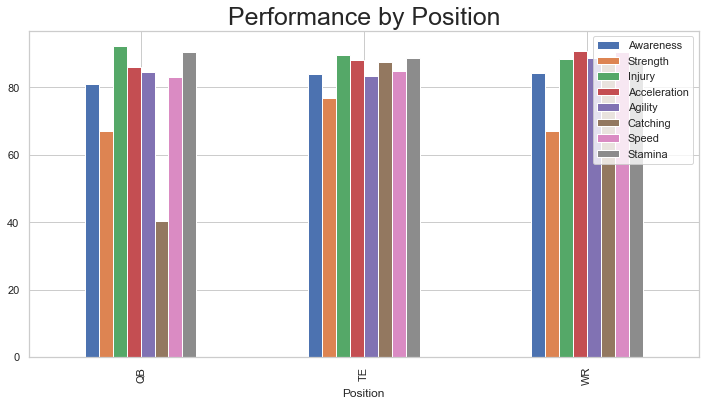

In [161]:
fig = positions.plot(kind="bar")
plt.title("Performance by Position", fontsize=25)
fig.figure.savefig(".\\images\\Performance_by_positions.png", dpi=1000)

In [69]:
salarytest = pd.DataFrame(toprank.groupby(["Position", "Player"])["Salary"].sum())
salarytest.sample(5)

Salary
Position Player              
QB       J. Hurts     6025168
WR       T. Patrick    750000
         D. Moore     4970000
TE       T. Kelce    36050000
WR       B. Cooks    53960000

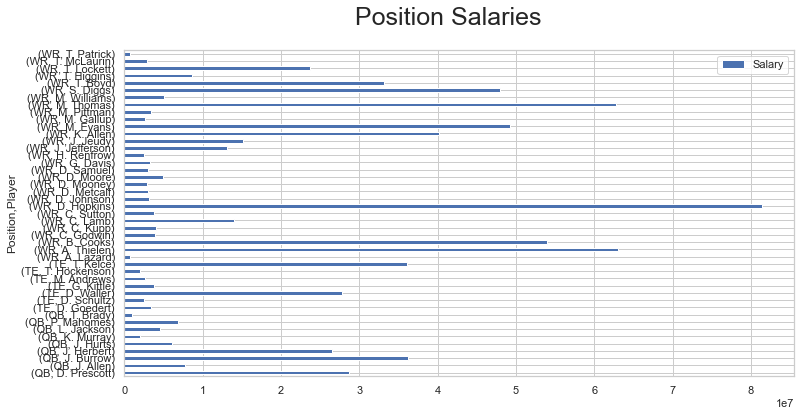

In [141]:
salarytest.plot(kind="barh");
plt.suptitle("Position Salaries", fontsize=25)
plt.show()

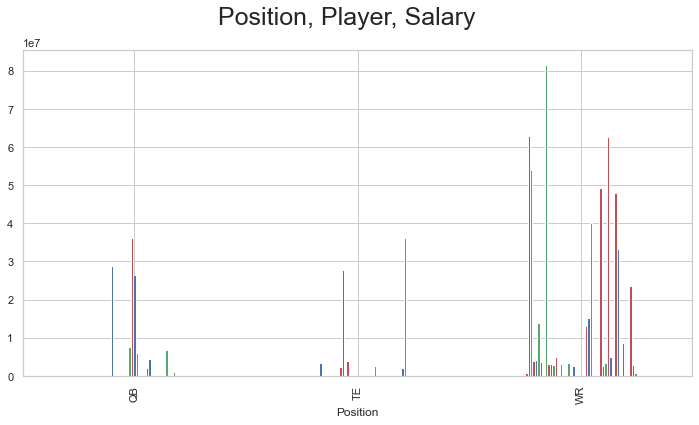

In [142]:
salarytest.unstack().plot(kind="bar",color=['r','b','g'], legend=False);
plt.suptitle("Position, Player, Salary", fontsize=25)
plt.show()

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_2404\1015874440.py:8: MatplotlibDeprecationWarning:

Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.



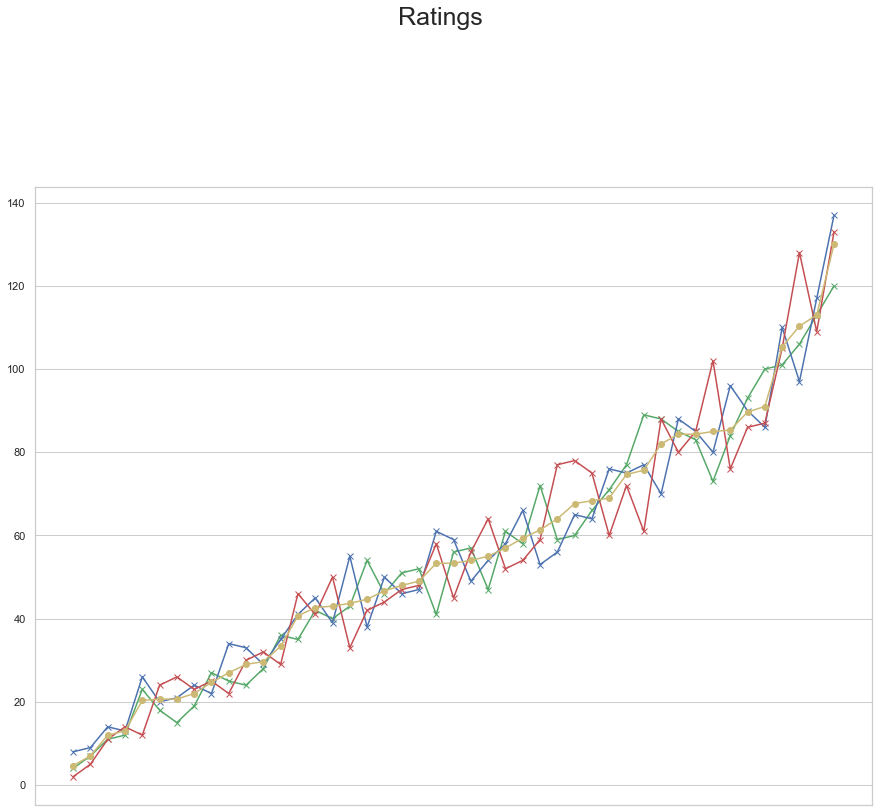

In [158]:
plt.figure(figsize=(15,25))
fig = plt.suptitle("Ratings", fontsize=25)
plt.subplot(211)
plt.plot('Player', 'Eisenberg_ranking', data=toprank, linestyle='-', marker='x', c='g')
plt.plot('Player', 'Richards_ranking', data=toprank, linestyle='-', marker='x', c='b')
plt.plot('Player', 'Cummings_ranking', data=toprank, linestyle='-', marker='x', c='r')
plt.plot('Player', 'My_Ranking', data=toprank, linestyle='-', marker='o', c='y')
plt.xticks([])
plt.show()
fig.figure.savefig(".\\images\\Ratings.png", dpi=1000)

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_2404\3420316529.py:14: MatplotlibDeprecationWarning:

Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.



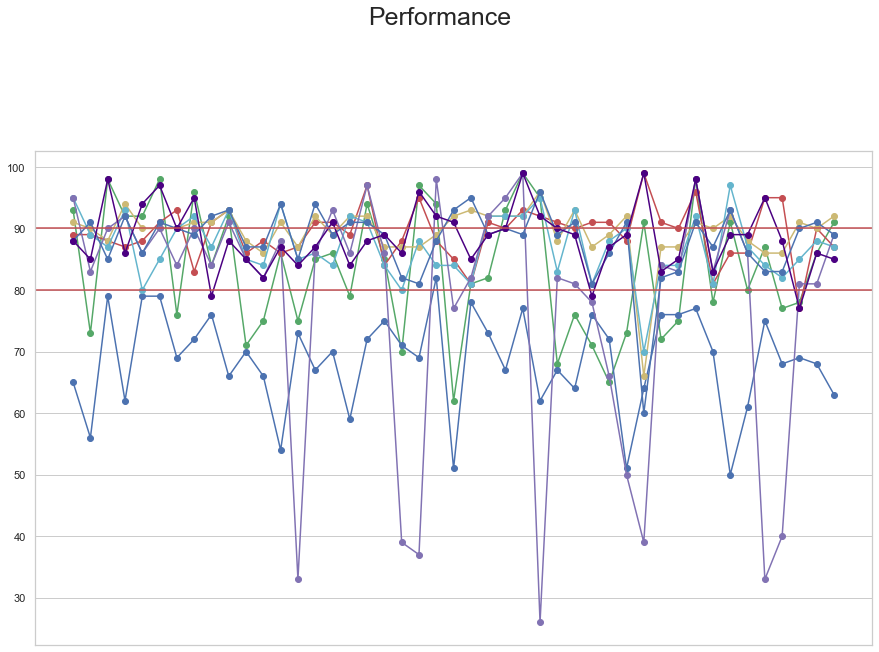

In [157]:
plt.figure(figsize=(15,20))
fig = plt.suptitle("Performance", fontsize=25)
plt.subplot(211)
plt.plot('Player', 'Awareness', data=toprank, linestyle='-', marker='o', c='g')
plt.plot('Player', 'Strength', data=toprank, linestyle='-', marker='o', c='b')
plt.plot('Player', 'Injury', data=toprank, linestyle='-', marker='o', c='r')
plt.plot('Player', 'Acceleration', data=toprank, linestyle='-', marker='o', c='y')
plt.plot('Player', 'Agility', data=toprank, linestyle='-', marker='o', c='c')
plt.plot('Player', 'Catching', data=toprank, linestyle='-', marker='o', c='m')
plt.plot('Player', 'Speed', data=toprank, linestyle='-', marker='o', c='b')
plt.plot('Player', 'Stamina', data=toprank, linestyle='-', marker='o', c='indigo')
plt.axhline(y=80, color='r', linestyle='-')
plt.axhline(y=90, color='r', linestyle='-')
plt.xticks([])
plt.show()
fig.figure.savefig(".\\images\\Performance.png", dpi=1000)

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_2404\119816162.py:8: MatplotlibDeprecationWarning:

Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.



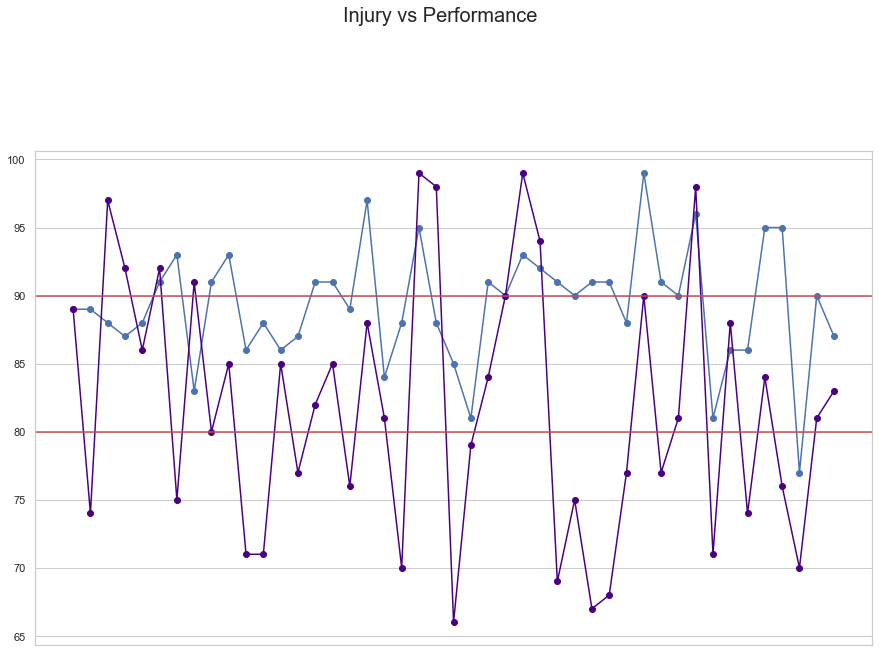

In [156]:
plt.figure(figsize=(15,20))
plt.suptitle("Injury vs Performance", fontsize=20)
fig = plt.subplot(211)
plt.plot('Player', 'Injury', data=toprank, linestyle='-', marker='o', c='b')
plt.plot('Player', 'Overall Rating', data=toprank, linestyle='-', marker='o', c='indigo')
plt.axhline(y=80, color='r', linestyle='-')
plt.axhline(y=90, color='r', linestyle='-')
plt.xticks([])
plt.show()
fig.figure.savefig(".\\images\\Injury_vs_Performance.png", dpi=1000)

C:\Users\Edgard_Cuadra\AppData\Local\Temp\ipykernel_2404\270443642.py:11: MatplotlibDeprecationWarning:

Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.



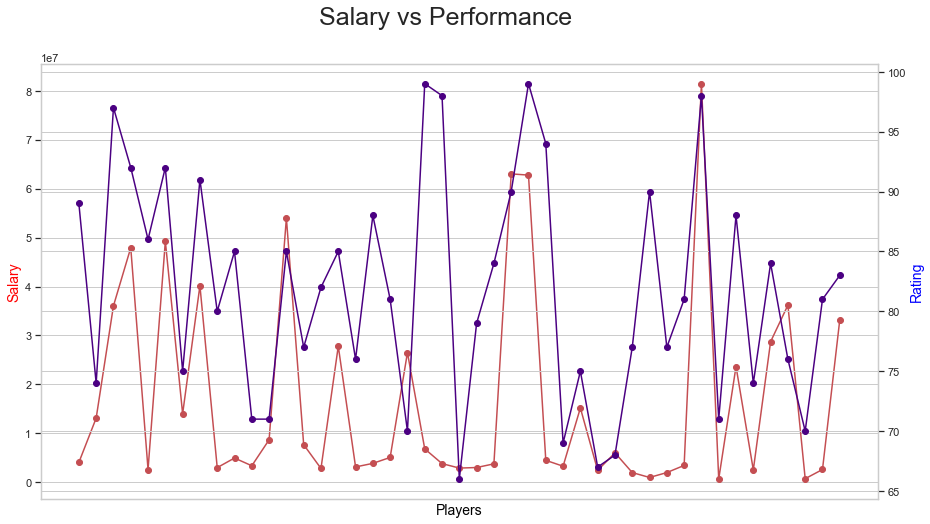

In [155]:
plt.figure(figsize=(15,8))
fig = plt.subplot()
plt.suptitle("Salary vs Performance", fontsize=25)
ax = plt.subplot()
ax.plot('Player', 'Salary', data=toprank, linestyle='-', marker='o', c='r')
ax.set_ylabel("Salary", color="Red",fontsize = 14)
ax.set_xlabel("Players", color="Black",fontsize = 14)
ax2=ax.twinx()
ax2.plot('Player', 'Overall Rating', data=toprank, linestyle='-', marker='o', c='indigo')
ax2.set_ylabel("Rating",color="blue",fontsize=14)
plt.xticks([])
plt.show()
fig.figure.savefig(".\\images\\Salary_vs_Performance.png", dpi=1000)

In [149]:
pwd

'C:\\Users\\Edgard_Cuadra\\OneDrive\\Desktop\\Ironhack\\Projects\\Project_2_Pipeline'